In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"dataset/iris.arff.csv", header=0)
data.drop(["class"], axis=1, inplace=True)
print(data)

     sepallength  sepalwidth  petallength  petalwidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]


In [3]:
class KNN:
    def __init__(self, k):
        self.k = k
    def fit(self, X, y):
        '''训练
        
        Parameeters
        -----
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        y: 类数组类型，形状为：[样本数量]
        
        '''
        self.X = np.asarray(X)
        self.y = np.asarray(y)
    def predict(self, X):
        '''对样本进行预测
        Parameters:
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        Returns:
        数组类型，预测结果
        '''
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x - self.X)**2, axis=1))
            index = dis.argsort()
            index = index[:self.k]
            result.append(np.mean(self.y[index])) # 计算均值
        return np.asarray(result)
    def predict2(self, X):
        '''对样本进行预测，考虑权重
        
        权重计算方式：使用每个节点(邻居)距离的倒数/所有节点距离倒数只和
        
        Parameters:
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        Returns:
        数组类型，预测结果
        '''
        X = np.asarray(X)
        result = []
        for x in X:
            # 计算与训练集的距离，取平方后开方
            dis = np.sqrt(np.sum((x - self.X)**2, axis=1))
            index = dis.argsort()
            index = index[:self.k]
            s = np.sum(1/(dis[index]+0.001)) # 最后加一个一很小的数就是为了避免距离为0的情况
            weight = (1/(dis[index]+0.001))/s # 距离倒数/倒数之和
            result.append(np.sum(self.y[index]*weight)) # 邻居节点标签纸*对应权重相加求和
        return np.asarray(result)

In [4]:
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:120, :-1]
train_y = t.iloc[:120, -1]
test_X = t.iloc[120:, :-1]
test_y = t.iloc[120:, -1]
knn = KNN(k=3)
knn.fit(train_X, train_y)
result = knn.predict(test_X)
result2 = knn.predict2(test_X)
display(result)
display(test_y.values)

array([0.33333333, 2.06666667, 0.2       , 0.2       , 1.9       ,
       0.23333333, 2.2       , 1.26666667, 1.2       , 1.16666667,
       1.93333333, 2.13333333, 1.83333333, 1.93333333, 0.13333333,
       1.16666667, 2.23333333, 1.96666667, 0.3       , 1.46666667,
       1.26666667, 1.66666667, 1.33333333, 0.26666667, 0.2       ,
       0.13333333, 2.03333333, 1.26666667, 2.2       , 0.23333333])

array([0.2, 2. , 0.3, 0.2, 1.9, 0.2, 2.4, 1.3, 1.2, 1. , 2.3, 2.3, 1.5,
       1.7, 0.2, 1. , 2.4, 1.9, 0.2, 1.3, 1.3, 1.8, 1.3, 0.2, 0.4, 0.1,
       1.8, 1. , 2.2, 0.2])

In [5]:
display(np.mean(np.sum((result - test_y)**2)))
display(np.mean(np.sum((result2 - test_y)**2)))

0.7244444444444444

0.7650802020943153

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False # 显示负号


No handles with labels found to put in legend.


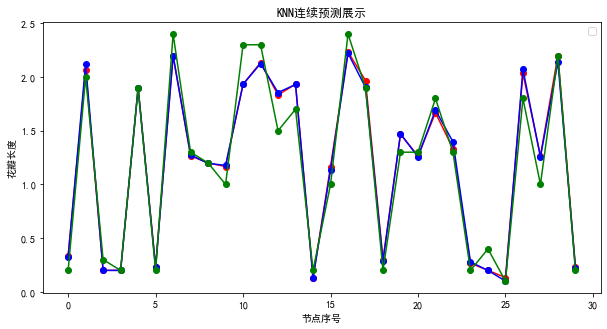

In [7]:
plt.figure(figsize=(10,5))
plt.plot(result, 'ro-')  # 红色圆圈表示"不带"权重鱼的预测值
plt.plot(result2, 'bo-') # 蓝色圆圈表示"带"权重鱼的预测值
plt.plot(test_y.values, 'go-') # 绿色圆圈表示测试集真实值
plt.title('KNN连续预测展示')
plt.xlabel('节点序号')
plt.ylabel('花瓣长度')
plt.legend()
plt.show()